# QuickGuide for Rtings

[프로젝트 페이지: Research-on-the-TV-market](https://github.com/xikest/research-market-tv)

## Env setting: Install requirements

In [1]:
!pip install -U openpyxl tqdm --q
!pip install -U requests selenium beautifulsoup4 --q
!pip install -U plotly streamlit --q
!pip install -U mkt-retv xik_tools --q

In [2]:
from tools.web import Installer
Installer.install_chrome_and_driver()

# Data prepare

- Input model list
- `Choose` one of the following methods

## Env. Import

In [1]:
from market_research.scraper import Rtings, Rurlsearcher, Rvisualizer

### 1. use search engine

In [2]:
rurlsearcher = Rurlsearcher()

In [5]:
urls = rurlsearcher.get_urls_from_web()

## Get data

- `check` url search results and `edit` them to use

In [7]:
rtings = Rtings()
data_dict = rtings.get_data(urls=urls)

# plot

- seaborn plot color map: https://seaborn.pydata.org/tutorial/color_palettes.html  
- plotly plot color map: https://plotly.com/python/builtin-colorscales/

In [2]:
measurement_df = data_dict.get("measurement")
scores_df = data_dict.get("scores")

## Rtings score

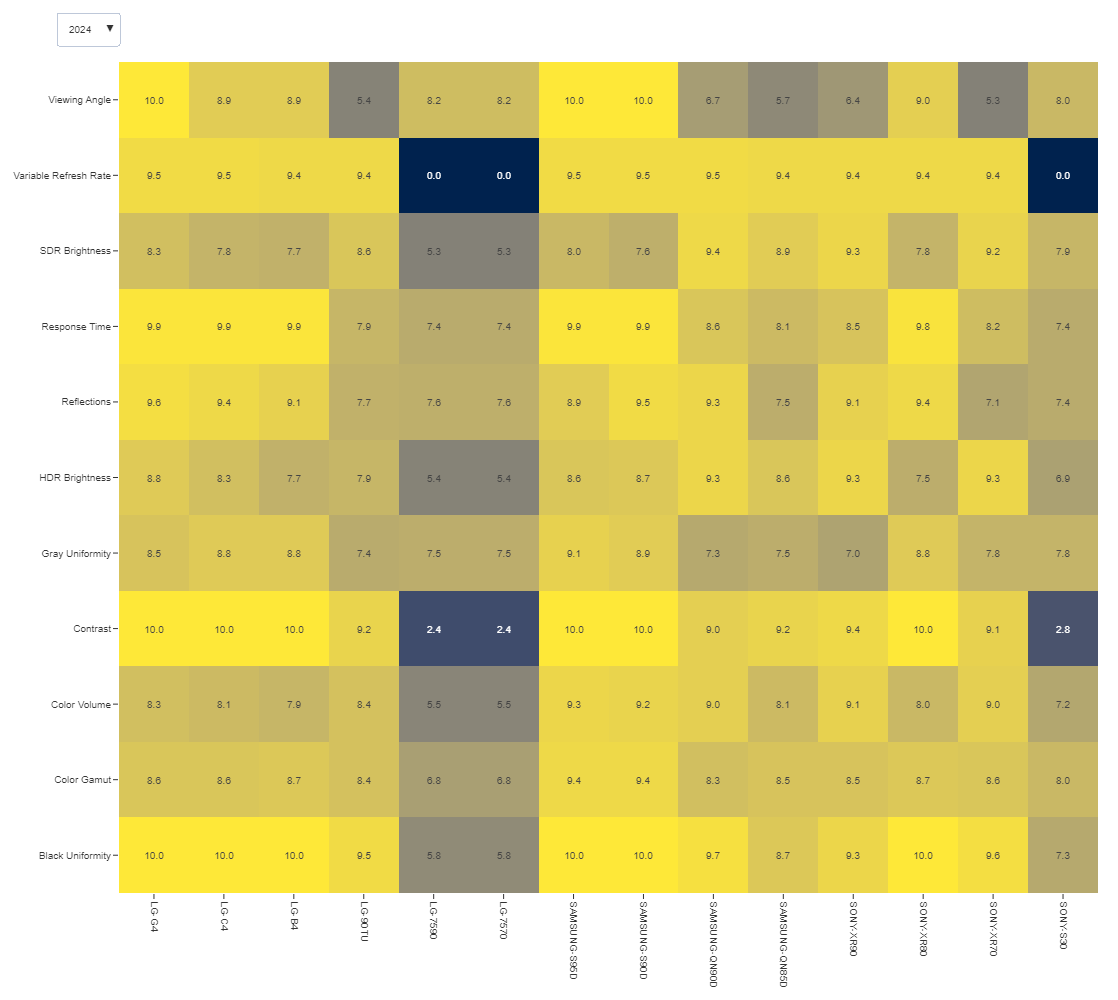

In [5]:
rvisualizer = Rvisualizer(measurement_dict)
rvisualizer.heatmap_scores()

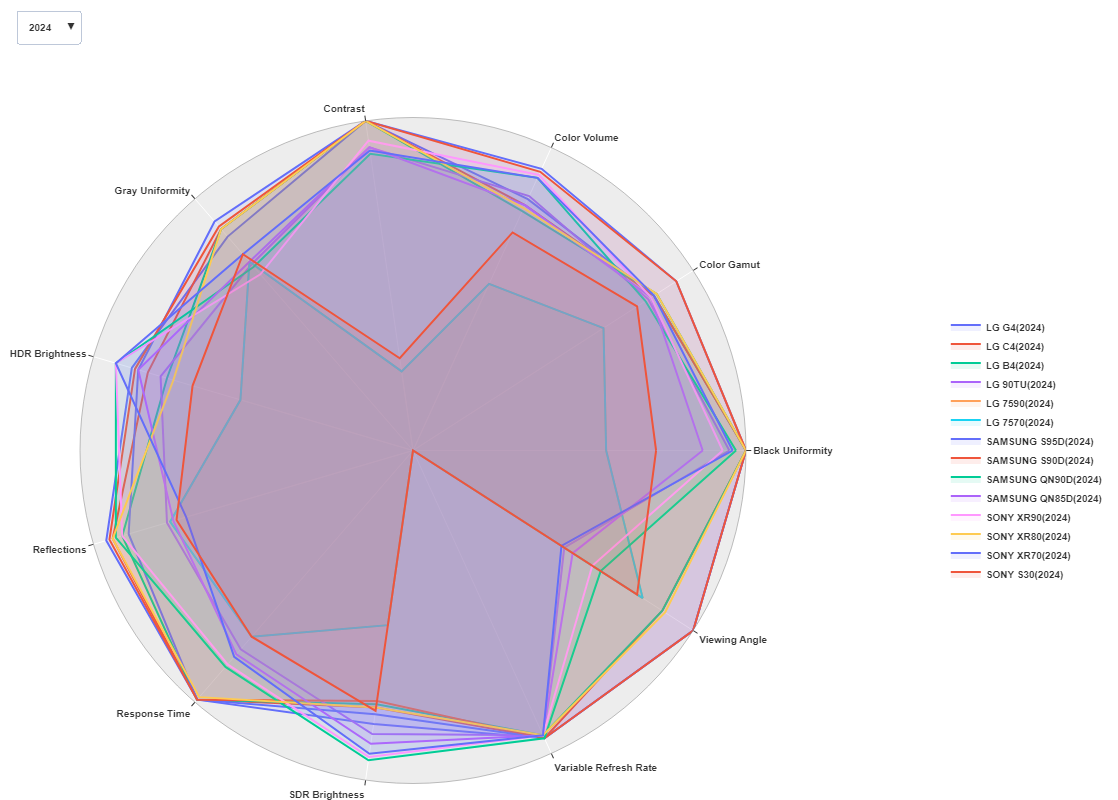

In [6]:
rvisualizer = Rvisualizer(measurement_dict)
rvisualizer.radar_scores()

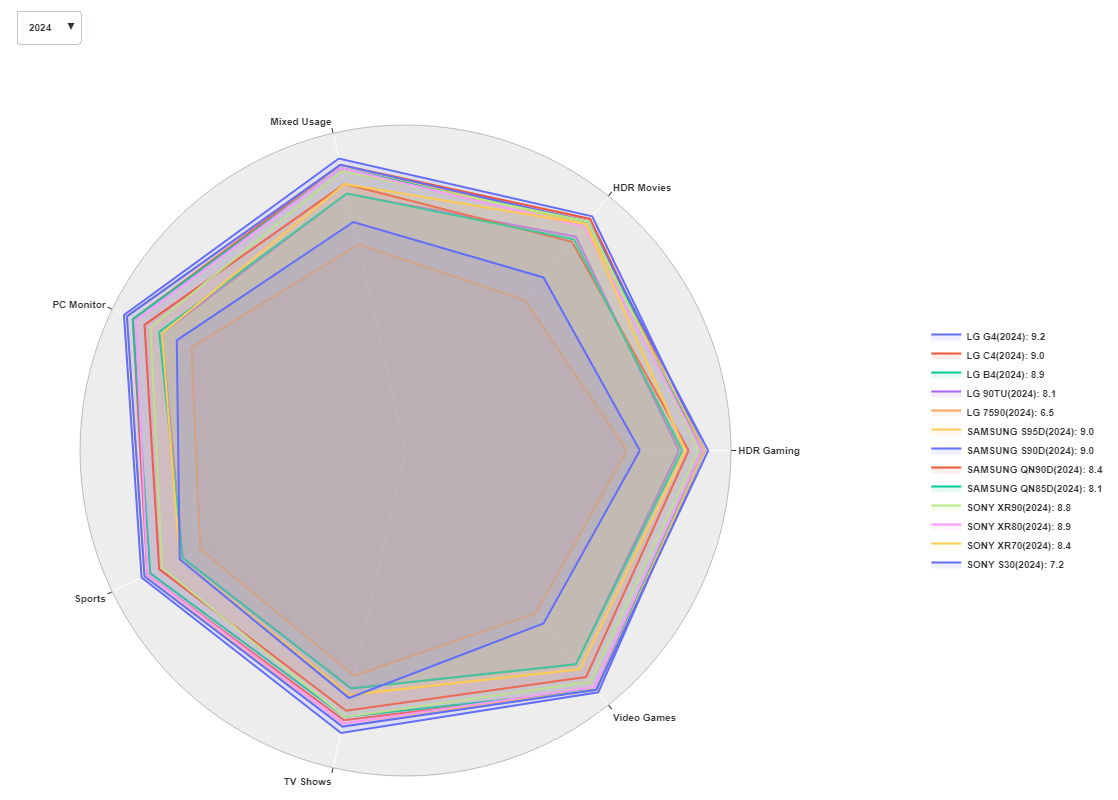

In [7]:
rvisualizer = Rvisualizer(scores_dict)
rvisualizer.radar_scores()

## PCA: Principal component analysis

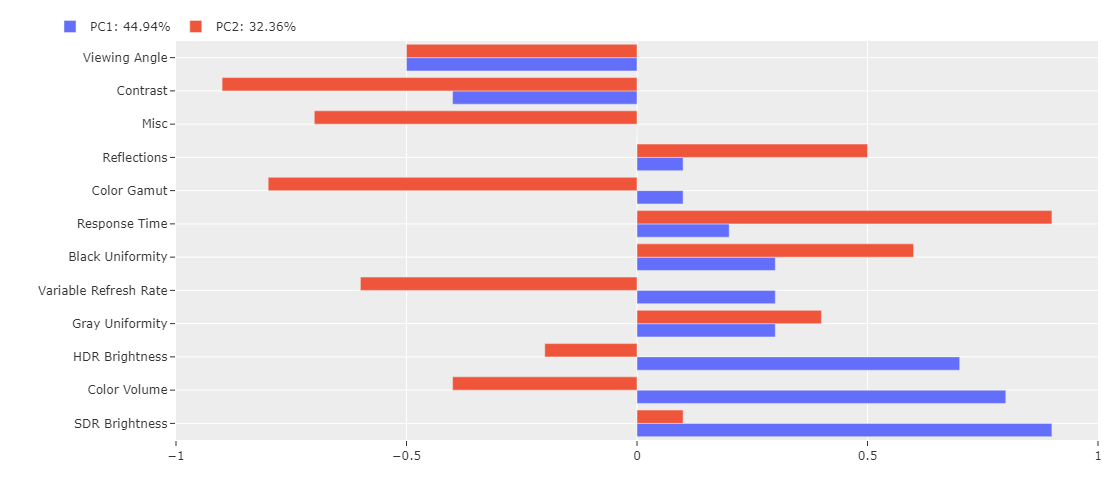

In [8]:
rvisualizer = Rvisualizer(measurement_dict)
rvisualizer.plot_pca()

## Plot detail

In [10]:
rvisualizer = Rvisualizer(measurement_dict)
subcategories = Rvisualizer.get_measurement_selection()

HDR Brightness
----------------------------------------------------------------------------------------------------


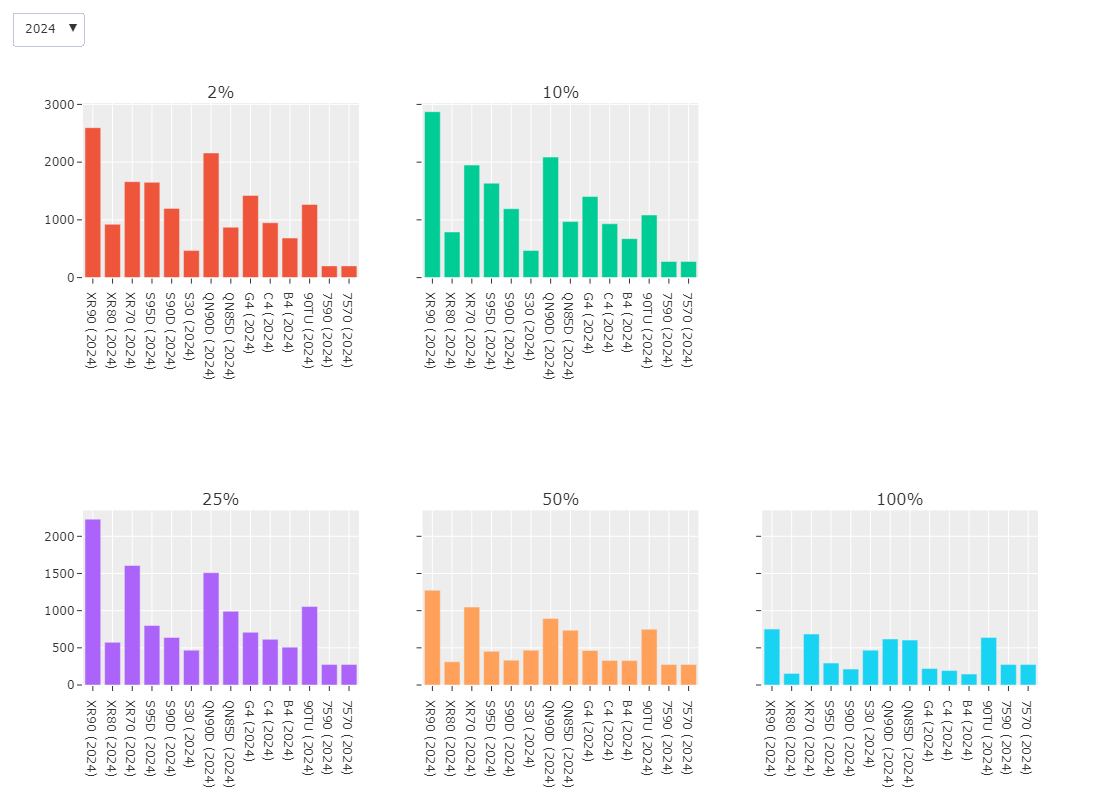

SDR Brightness
----------------------------------------------------------------------------------------------------


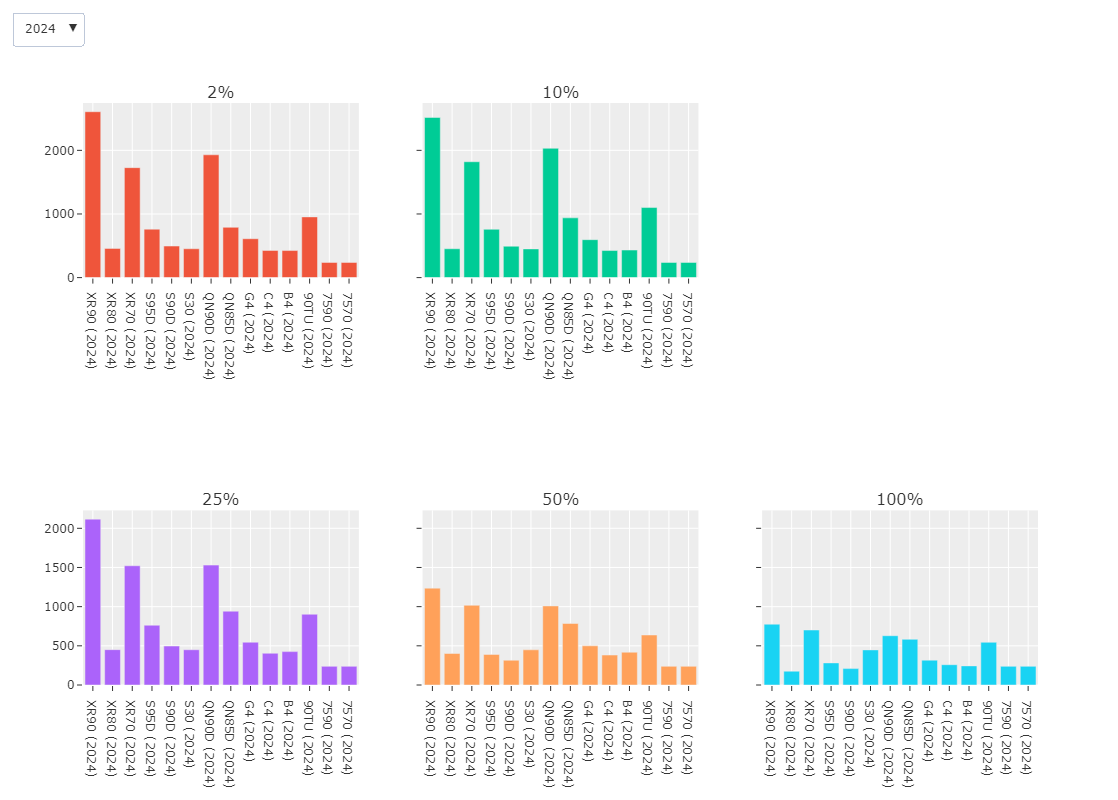

Contrast
----------------------------------------------------------------------------------------------------


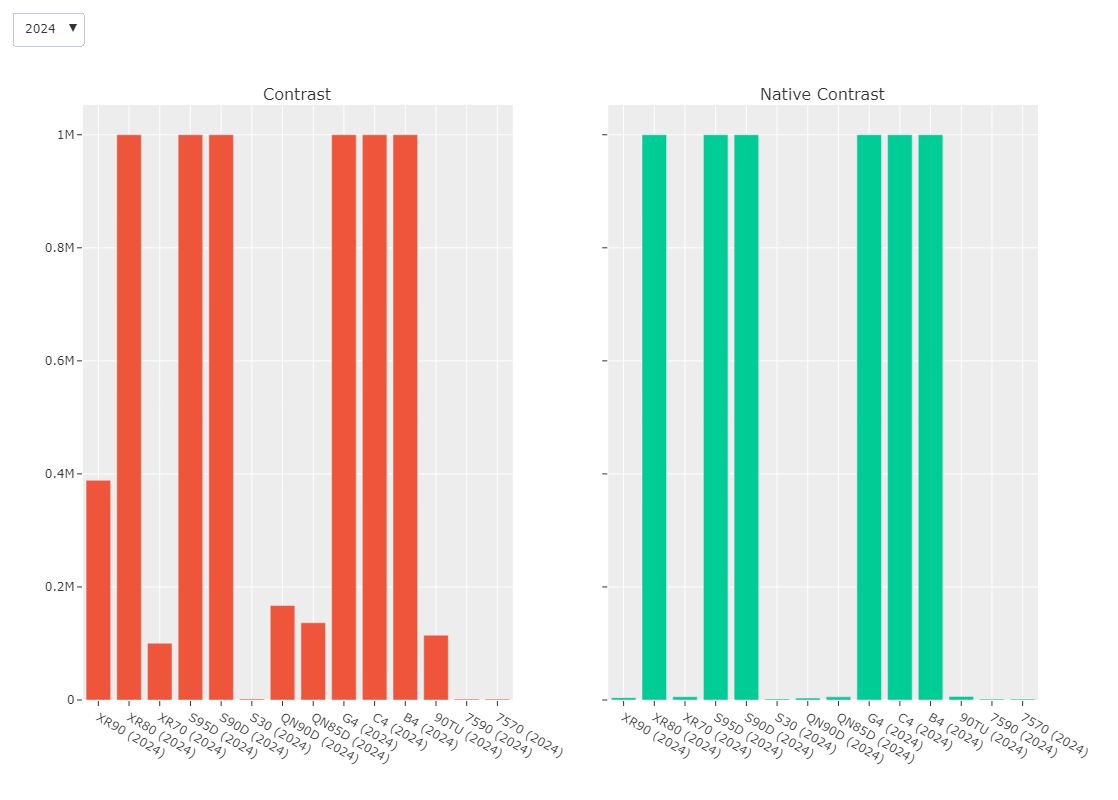

Black Uniformity
----------------------------------------------------------------------------------------------------


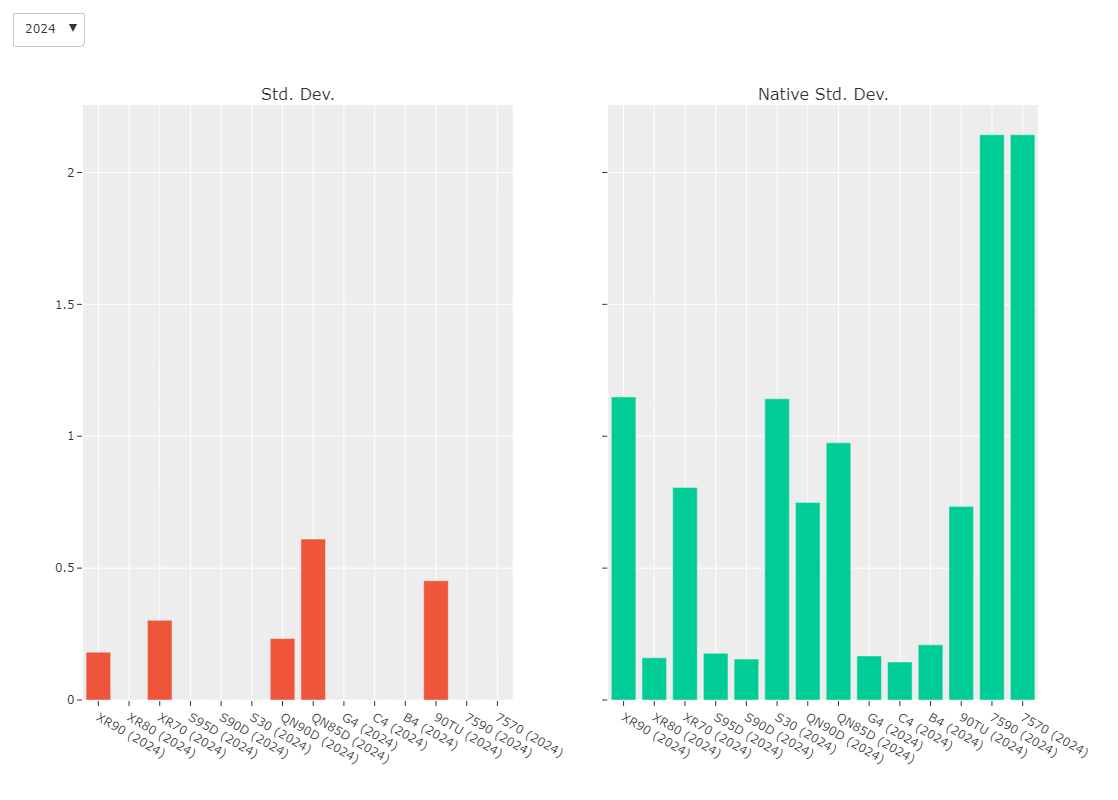

Color Gamut
----------------------------------------------------------------------------------------------------


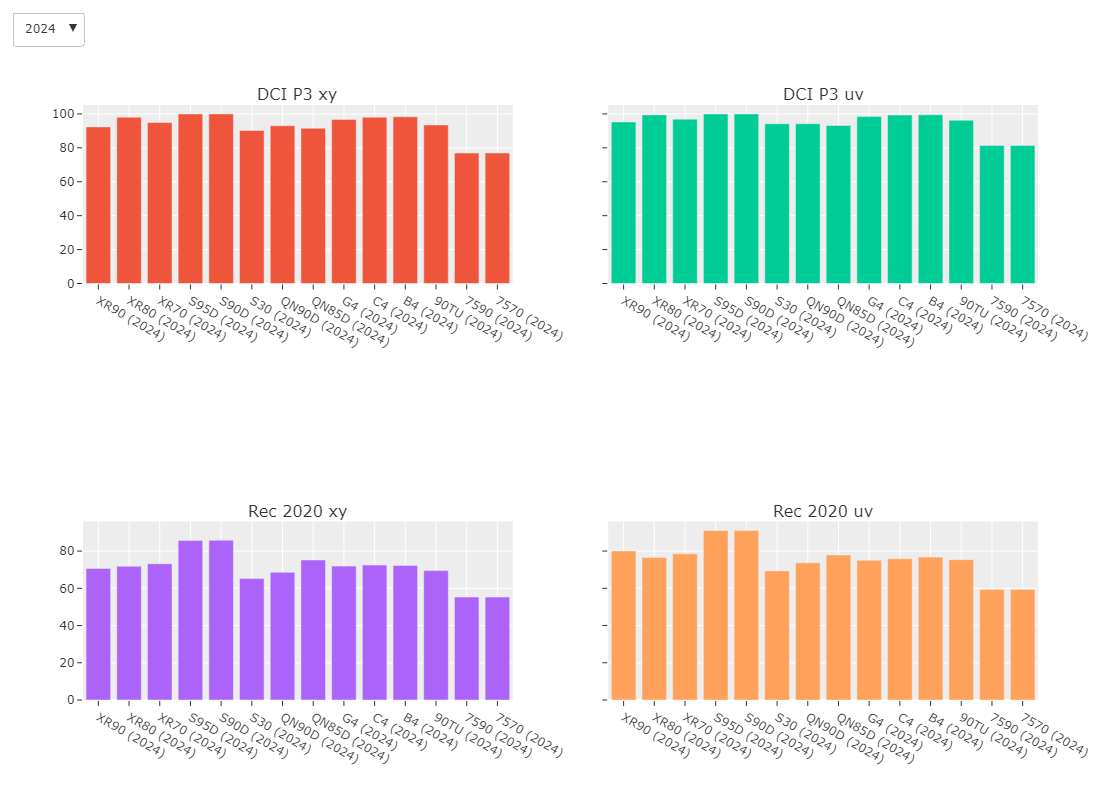

Color Volume
----------------------------------------------------------------------------------------------------


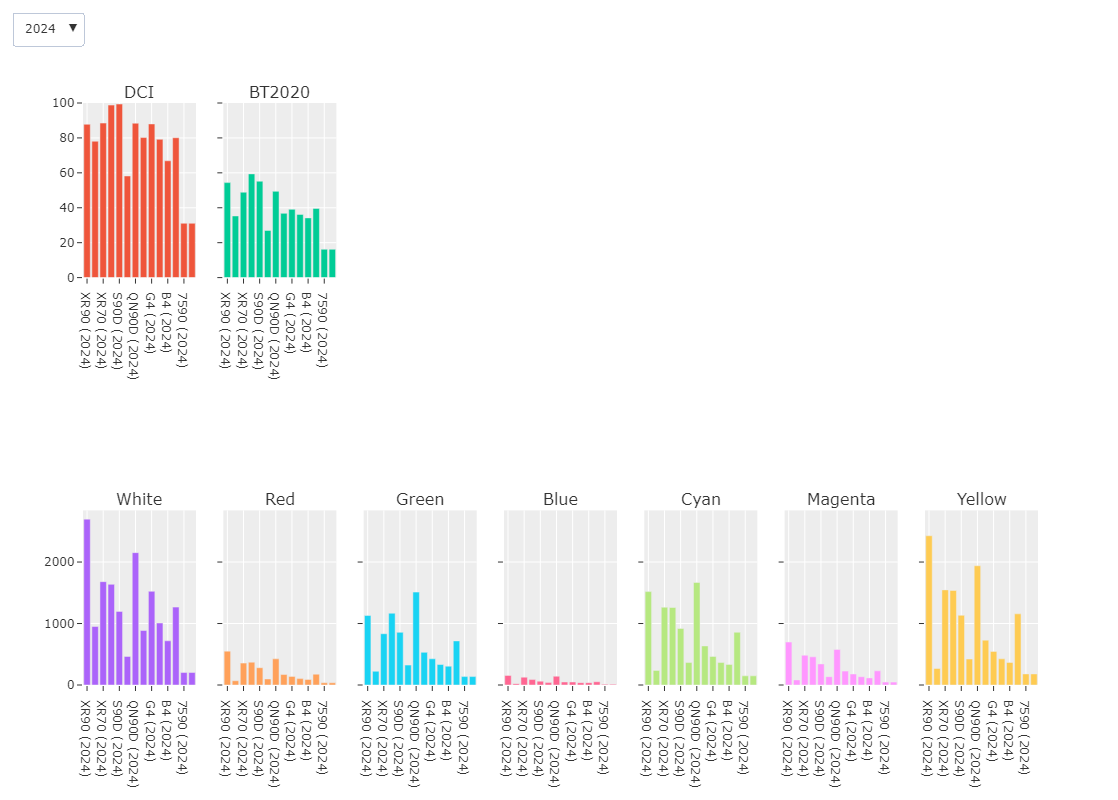

Viewing Angle
----------------------------------------------------------------------------------------------------


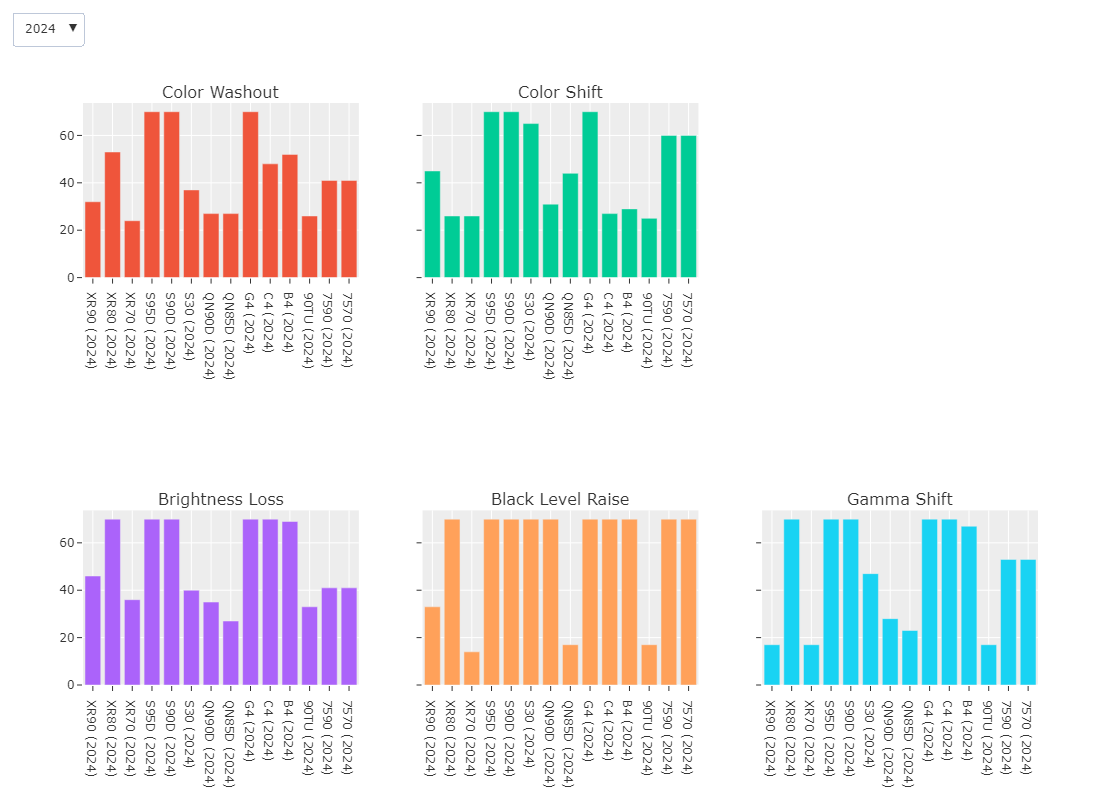

Reflections
----------------------------------------------------------------------------------------------------


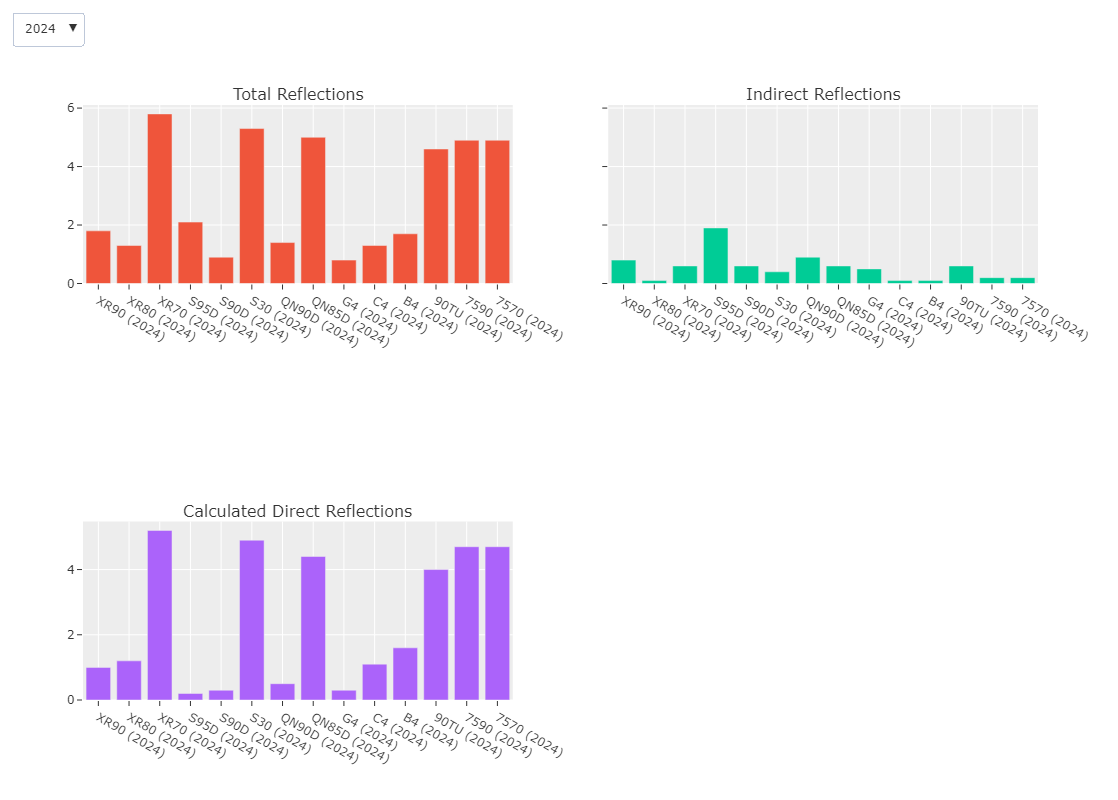

Gray Uniformity
----------------------------------------------------------------------------------------------------


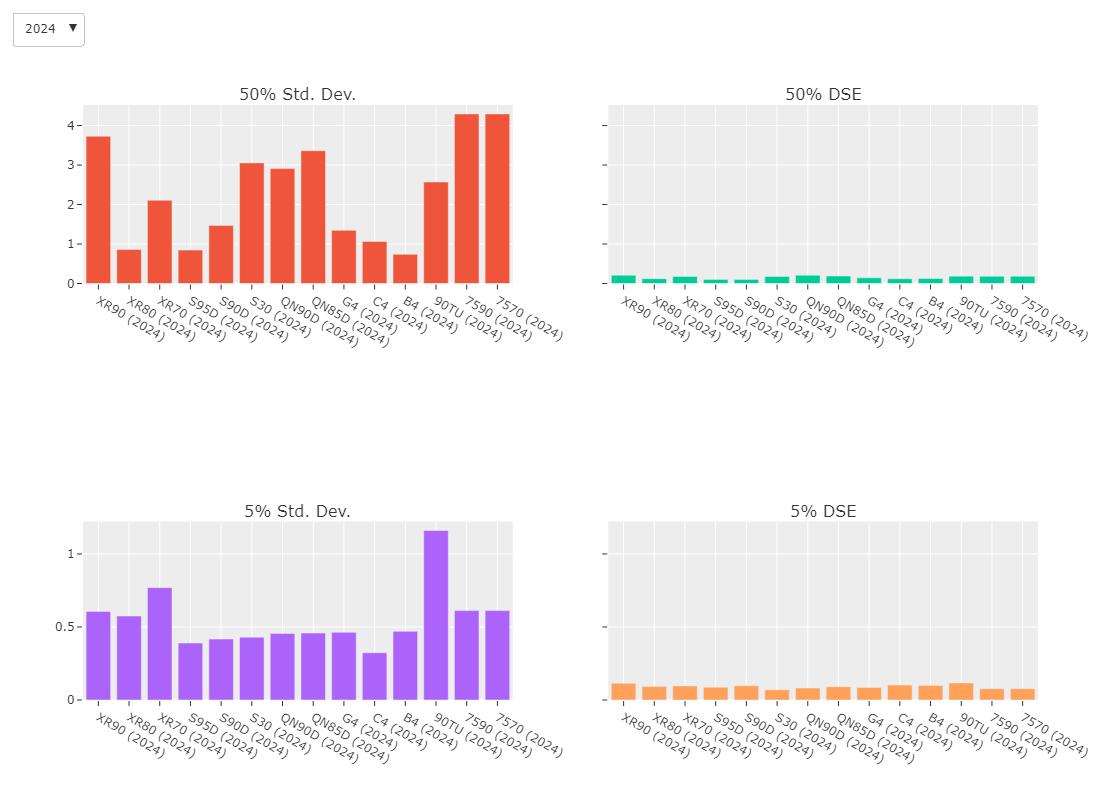

Response Time
----------------------------------------------------------------------------------------------------


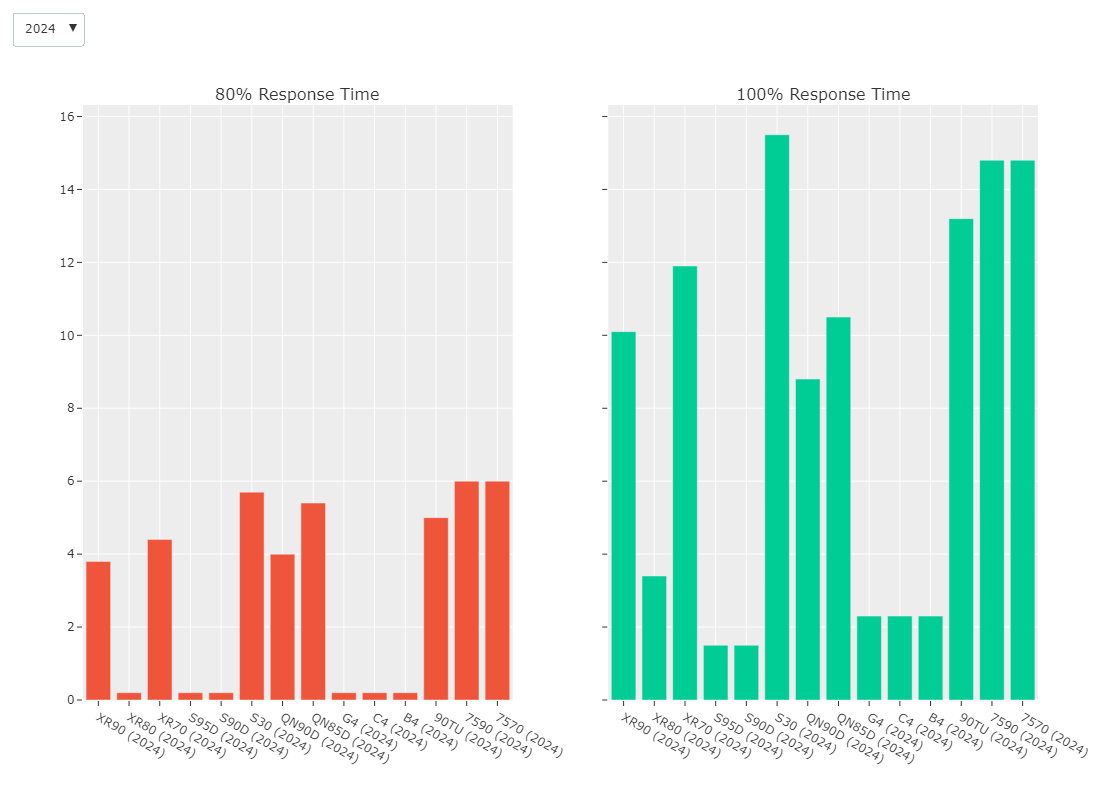

Misc
----------------------------------------------------------------------------------------------------


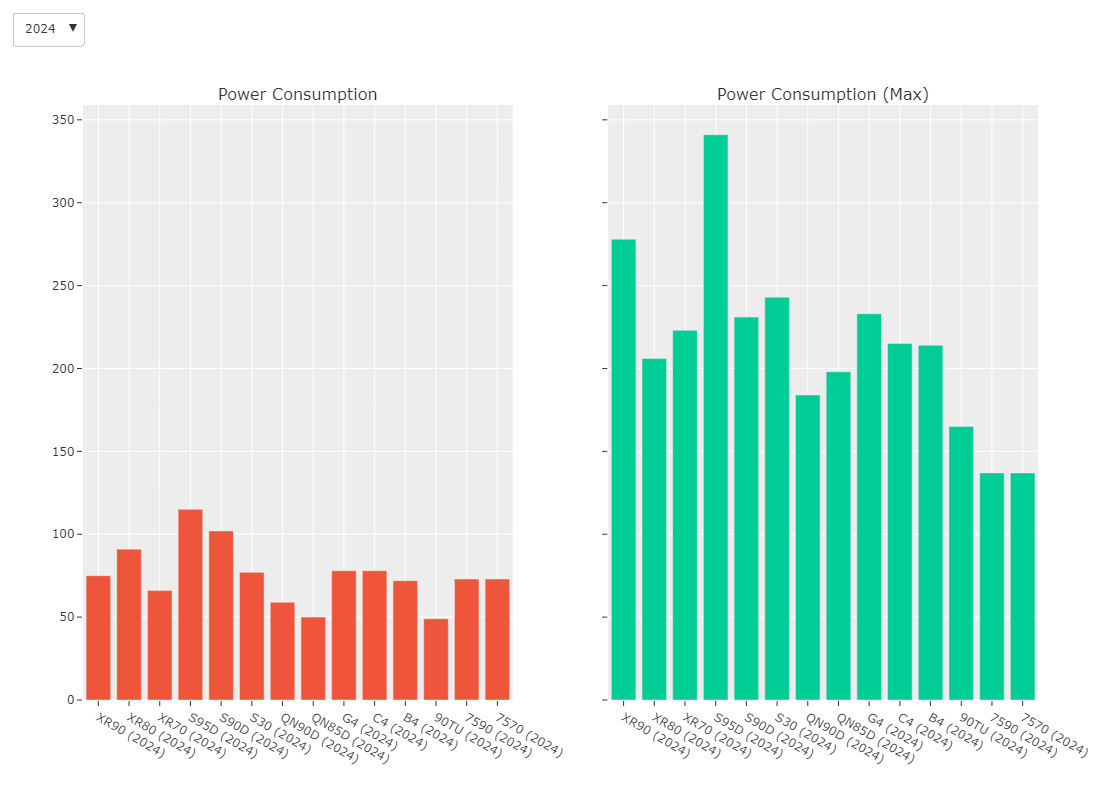

Variable Refresh Rate
----------------------------------------------------------------------------------------------------


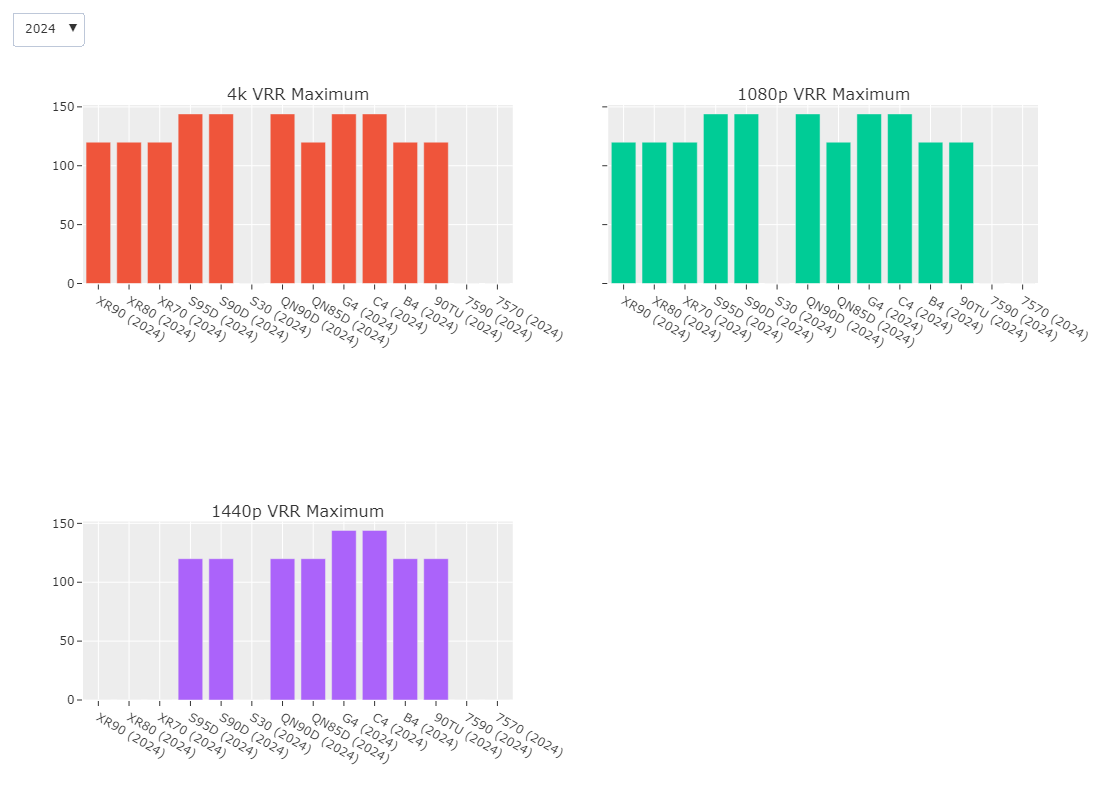

In [9]:
for subcategory in subcategories:
    print(subcategory)
    print("-"*100)
    rvisualizer.plot_facet_bar(subcategory)

# colab에서 파일 받기

In [1]:
from google.colab import files
!zip -r /content/results.zip /content/results
files.download('/content/results.zip')

---